In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [6]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 3000
total training dog images: 3000
total validation cat images: 1500
total validation dog images: 1500
--
Total training images: 6000
Total validation images: 3000


In [7]:
batch_size = 128
epochs = 200
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [10]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

(128, 150, 150, 3)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
#     plt.savefig("cats-vs-dogs.png")
    plt.show()

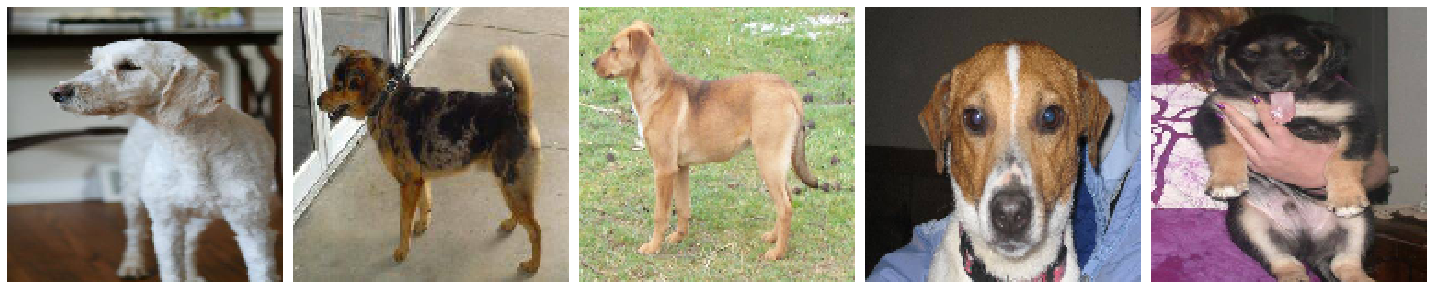

In [12]:
plotImages(sample_training_images[13:18])


In [13]:
model1 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [14]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [16]:
history1 = model1.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/200
46/46 [==============================] - 40s 874ms/step - loss: 0.6863 - accuracy: 0.5664 - val_loss: 0.6408 - val_accuracy: 0.6175
Epoch 2/200
46/46 [==============================] - 19s 423ms/step - loss: 0.5981 - accuracy: 0.6764 - val_loss: 0.5845 - val_accuracy: 0.6807
Epoch 3/200
46/46 [==============================] - 21s 447ms/step - loss: 0.5371 - accuracy: 0.7330 - val_loss: 0.5165 - val_accuracy: 0.7466
Epoch 4/200
46/46 [==============================] - 20s 437ms/step - loss: 0.4870 - accuracy: 0.7684 - val_loss: 0.4910 - val_accuracy: 0.7565
Epoch 5/200
46/46 [==============================] - 19s 421ms/step - loss: 0.4707 - accuracy: 0.7764 - val_loss: 0.4622 - val_accuracy: 0.7799
Epoch 6/200
46/46 [==============================] - 19s 415ms/step - loss: 0.3925 - accuracy: 0.8244 - val_loss: 0.4742 - val_accuracy: 0.7812
Epoch 7/200
46/46 [==============================] - 19s 414ms/step - loss: 0.3665 - accuracy: 0.8333 - val_loss: 0.4353 - val_accuracy:

46/46 [==============================] - 20s 431ms/step - loss: 4.9805e-05 - accuracy: 1.0000 - val_loss: 1.1828 - val_accuracy: 0.8414
Epoch 57/200
46/46 [==============================] - 19s 420ms/step - loss: 4.6909e-05 - accuracy: 1.0000 - val_loss: 1.1881 - val_accuracy: 0.8414
Epoch 58/200
46/46 [==============================] - 19s 415ms/step - loss: 4.4042e-05 - accuracy: 1.0000 - val_loss: 1.1909 - val_accuracy: 0.8414
Epoch 59/200
46/46 [==============================] - 19s 407ms/step - loss: 4.2073e-05 - accuracy: 1.0000 - val_loss: 1.1932 - val_accuracy: 0.8400
Epoch 60/200
46/46 [==============================] - 19s 411ms/step - loss: 4.1260e-05 - accuracy: 1.0000 - val_loss: 1.1980 - val_accuracy: 0.8404
Epoch 61/200
46/46 [==============================] - 20s 427ms/step - loss: 3.8520e-05 - accuracy: 1.0000 - val_loss: 1.2037 - val_accuracy: 0.8407
Epoch 62/200
46/46 [==============================] - 19s 412ms/step - loss: 3.5475e-05 - accuracy: 1.0000 - val_loss: 

Epoch 111/200
46/46 [==============================] - 19s 407ms/step - loss: 5.6392e-06 - accuracy: 1.0000 - val_loss: 1.3279 - val_accuracy: 0.8410
Epoch 112/200
46/46 [==============================] - 18s 400ms/step - loss: 5.2002e-06 - accuracy: 1.0000 - val_loss: 1.3296 - val_accuracy: 0.8414
Epoch 113/200
46/46 [==============================] - 19s 405ms/step - loss: 5.2949e-06 - accuracy: 1.0000 - val_loss: 1.3333 - val_accuracy: 0.8410
Epoch 114/200
46/46 [==============================] - 19s 410ms/step - loss: 5.1935e-06 - accuracy: 1.0000 - val_loss: 1.3344 - val_accuracy: 0.8417
Epoch 115/200
46/46 [==============================] - 21s 447ms/step - loss: 4.5925e-06 - accuracy: 1.0000 - val_loss: 1.3368 - val_accuracy: 0.8410
Epoch 116/200
46/46 [==============================] - 19s 412ms/step - loss: 4.6686e-06 - accuracy: 1.0000 - val_loss: 1.3381 - val_accuracy: 0.8424
Epoch 117/200
46/46 [==============================] - 20s 424ms/step - loss: 4.5048e-06 - accuracy:

46/46 [==============================] - 19s 410ms/step - loss: 1.1206e-06 - accuracy: 1.0000 - val_loss: 1.4218 - val_accuracy: 0.8417
Epoch 166/200
46/46 [==============================] - 18s 401ms/step - loss: 1.0261e-06 - accuracy: 1.0000 - val_loss: 1.4244 - val_accuracy: 0.8414
Epoch 167/200
46/46 [==============================] - 18s 393ms/step - loss: 1.0219e-06 - accuracy: 1.0000 - val_loss: 1.4246 - val_accuracy: 0.8421
Epoch 168/200
46/46 [==============================] - 18s 401ms/step - loss: 9.7777e-07 - accuracy: 1.0000 - val_loss: 1.4274 - val_accuracy: 0.8417
Epoch 169/200
46/46 [==============================] - 19s 412ms/step - loss: 9.3008e-07 - accuracy: 1.0000 - val_loss: 1.4279 - val_accuracy: 0.8414
Epoch 170/200
46/46 [==============================] - 18s 397ms/step - loss: 9.4265e-07 - accuracy: 1.0000 - val_loss: 1.4303 - val_accuracy: 0.8414
Epoch 171/200
46/46 [==============================] - 18s 392ms/step - loss: 9.1916e-07 - accuracy: 1.0000 - val_

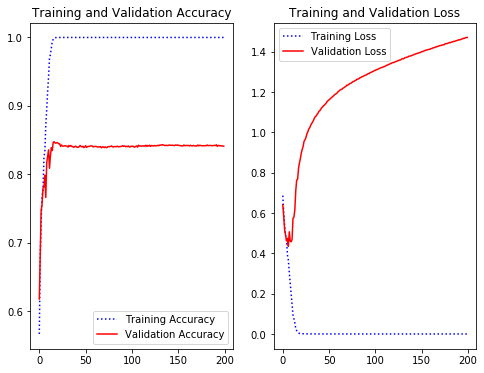

In [17]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color="b", linestyle=":")
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='r')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color="b", linestyle=":")
plt.plot(epochs_range, val_loss, label='Validation Loss', color='r')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
# plt.savefig("over_learning.png")
plt.show()

In [18]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [19]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 6000 images belonging to 2 classes.


In [20]:
augmented_images = [train_data_gen[0][0][2] for i in range(5)]

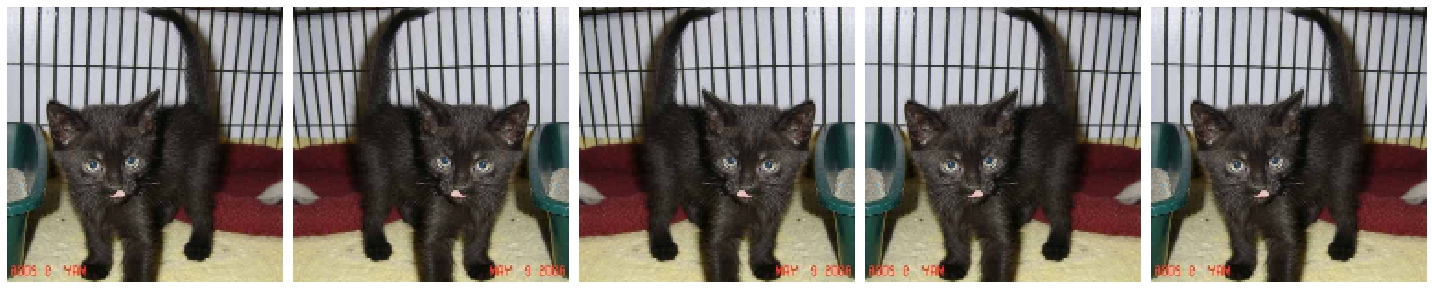

In [21]:
plotImages(augmented_images)

In [22]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [23]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][7] for i in range(5)]

Found 6000 images belonging to 2 classes.


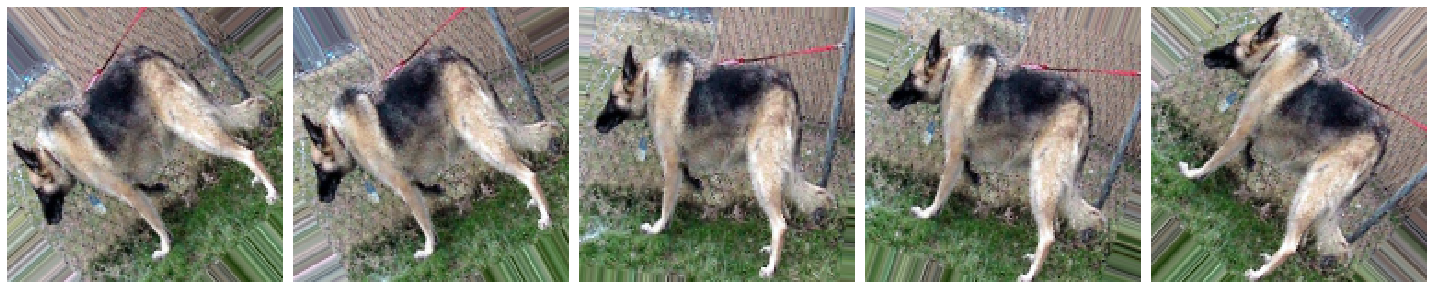

In [24]:
plotImages(augmented_images)

In [25]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [26]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][2] for i in range(5)]

Found 6000 images belonging to 2 classes.


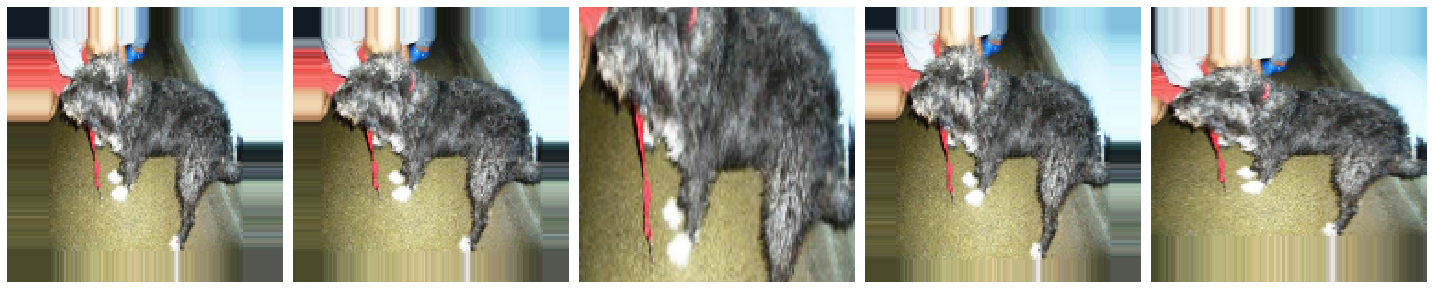

In [27]:
plotImages(augmented_images)

In [28]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [29]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 6000 images belonging to 2 classes.


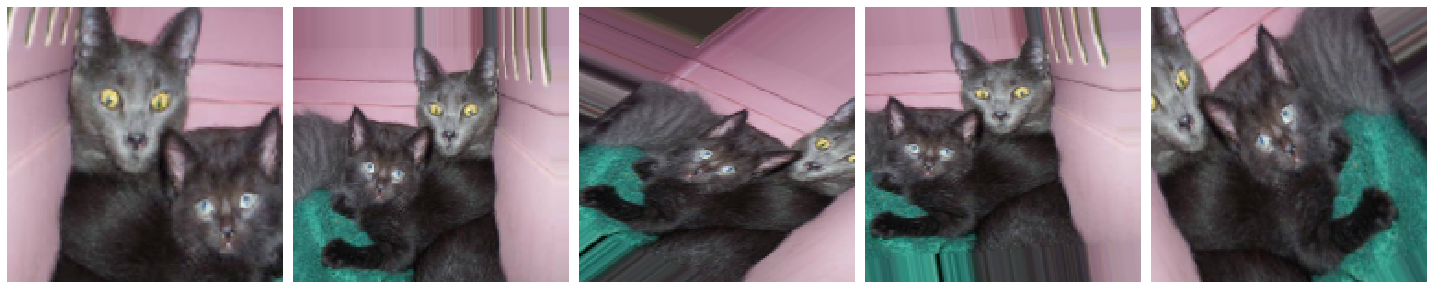

In [30]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [31]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [32]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 3000 images belonging to 2 classes.


In [33]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [34]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [35]:
history2 = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/200
46/46 [==============================] - 43s 932ms/step - loss: 0.8202 - accuracy: 0.5003 - val_loss: 0.6900 - val_accuracy: 0.5014
Epoch 2/200
46/46 [==============================] - 43s 937ms/step - loss: 0.6858 - accuracy: 0.5448 - val_loss: 0.6608 - val_accuracy: 0.6260
Epoch 3/200
46/46 [==============================] - 42s 914ms/step - loss: 0.6658 - accuracy: 0.5959 - val_loss: 0.6370 - val_accuracy: 0.6542
Epoch 4/200
46/46 [==============================] - 41s 892ms/step - loss: 0.6461 - accuracy: 0.6281 - val_loss: 0.6118 - val_accuracy: 0.6678
Epoch 5/200
46/46 [==============================] - 40s 865ms/step - loss: 0.6231 - accuracy: 0.6468 - val_loss: 0.6116 - val_accuracy: 0.6590
Epoch 6/200
46/46 [==============================] - 39s 850ms/step - loss: 0.6137 - accuracy: 0.6555 - val_loss: 0.5822 - val_accuracy: 0.7045
Epoch 7/200
46/46 [==============================] - 39s 844ms/step - loss: 0.6037 - accuracy: 0.6729 - val_loss: 0.5749 - val_accuracy:

46/46 [==============================] - 38s 835ms/step - loss: 0.4434 - accuracy: 0.7868 - val_loss: 0.4208 - val_accuracy: 0.8050
Epoch 58/200
46/46 [==============================] - 37s 805ms/step - loss: 0.4249 - accuracy: 0.7990 - val_loss: 0.3727 - val_accuracy: 0.8336
Epoch 59/200
46/46 [==============================] - 37s 794ms/step - loss: 0.4300 - accuracy: 0.7982 - val_loss: 0.3707 - val_accuracy: 0.8370
Epoch 60/200
46/46 [==============================] - 37s 807ms/step - loss: 0.4398 - accuracy: 0.7917 - val_loss: 0.3758 - val_accuracy: 0.8251
Epoch 61/200
46/46 [==============================] - 37s 814ms/step - loss: 0.4262 - accuracy: 0.8030 - val_loss: 0.3698 - val_accuracy: 0.8376
Epoch 62/200
46/46 [==============================] - 37s 798ms/step - loss: 0.4343 - accuracy: 0.7907 - val_loss: 0.3691 - val_accuracy: 0.8410
Epoch 63/200
46/46 [==============================] - 36s 785ms/step - loss: 0.4191 - accuracy: 0.8082 - val_loss: 0.3848 - val_accuracy: 0.829

46/46 [==============================] - 36s 774ms/step - loss: 0.3564 - accuracy: 0.8391 - val_loss: 0.3200 - val_accuracy: 0.8668
Epoch 114/200
46/46 [==============================] - 36s 786ms/step - loss: 0.3497 - accuracy: 0.8448 - val_loss: 0.2967 - val_accuracy: 0.8747
Epoch 115/200
46/46 [==============================] - 36s 772ms/step - loss: 0.3477 - accuracy: 0.8478 - val_loss: 0.3207 - val_accuracy: 0.8682
Epoch 116/200
46/46 [==============================] - 36s 783ms/step - loss: 0.3511 - accuracy: 0.8459 - val_loss: 0.3180 - val_accuracy: 0.8668
Epoch 117/200
46/46 [==============================] - 38s 817ms/step - loss: 0.3545 - accuracy: 0.8332 - val_loss: 0.3177 - val_accuracy: 0.8665
Epoch 118/200
46/46 [==============================] - 37s 814ms/step - loss: 0.3539 - accuracy: 0.8398 - val_loss: 0.3263 - val_accuracy: 0.8614
Epoch 119/200
46/46 [==============================] - 36s 774ms/step - loss: 0.3463 - accuracy: 0.8475 - val_loss: 0.3207 - val_accuracy:

46/46 [==============================] - 36s 779ms/step - loss: 0.3206 - accuracy: 0.8624 - val_loss: 0.2615 - val_accuracy: 0.8913
Epoch 170/200
46/46 [==============================] - 38s 817ms/step - loss: 0.3056 - accuracy: 0.8708 - val_loss: 0.2831 - val_accuracy: 0.8910
Epoch 171/200
46/46 [==============================] - 37s 804ms/step - loss: 0.3135 - accuracy: 0.8614 - val_loss: 0.2764 - val_accuracy: 0.8889
Epoch 172/200
46/46 [==============================] - 37s 808ms/step - loss: 0.3103 - accuracy: 0.8646 - val_loss: 0.2874 - val_accuracy: 0.8882
Epoch 173/200
46/46 [==============================] - 36s 785ms/step - loss: 0.3000 - accuracy: 0.8670 - val_loss: 0.2830 - val_accuracy: 0.8832
Epoch 174/200
46/46 [==============================] - 36s 787ms/step - loss: 0.2961 - accuracy: 0.8627 - val_loss: 0.3016 - val_accuracy: 0.8774
Epoch 175/200
46/46 [==============================] - 37s 794ms/step - loss: 0.3067 - accuracy: 0.8684 - val_loss: 0.2544 - val_accuracy:

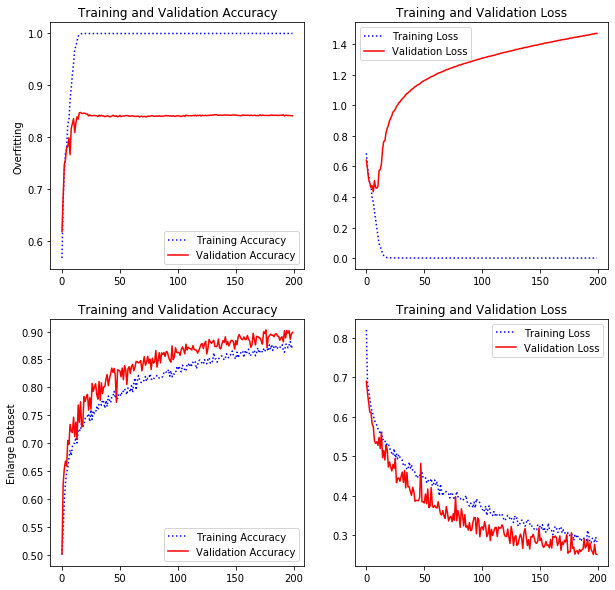

In [36]:
epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history1.history['accuracy'], label='Training Accuracy', color="b", linestyle=":")
plt.plot(epochs_range, history1.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.ylabel("Overfitting")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, history1.history['loss'], label='Training Loss', color="b", linestyle=":")
plt.plot(epochs_range, history1.history['val_loss'], label='Validation Loss', color='r')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.subplot(2, 2, 3)
plt.plot(epochs_range, history2.history['accuracy'], label='Training Accuracy', color="b", linestyle=":")
plt.plot(epochs_range, history2.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.ylabel("Enlarge Dataset")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 4)
plt.plot(epochs_range, history2.history['loss'], label='Training Loss', color="b", linestyle=":")
plt.plot(epochs_range, history2.history['val_loss'], label='Validation Loss', color='r')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("dogs-vs-cats3.png")
plt.show()

In [37]:
test_labels = val_data_gen[0][1]
print(test_labels.shape)
x_test = val_data_gen[0][0]
print(x_test.shape)

(128,)
(128, 150, 150, 3)


In [38]:
predictions = model_new.predict(x_test)
print(predictions.shape)
round(predictions[:128][0][0],0)

(128, 1)


0.0

In [39]:
class_names = ['Cat', 'Dog']

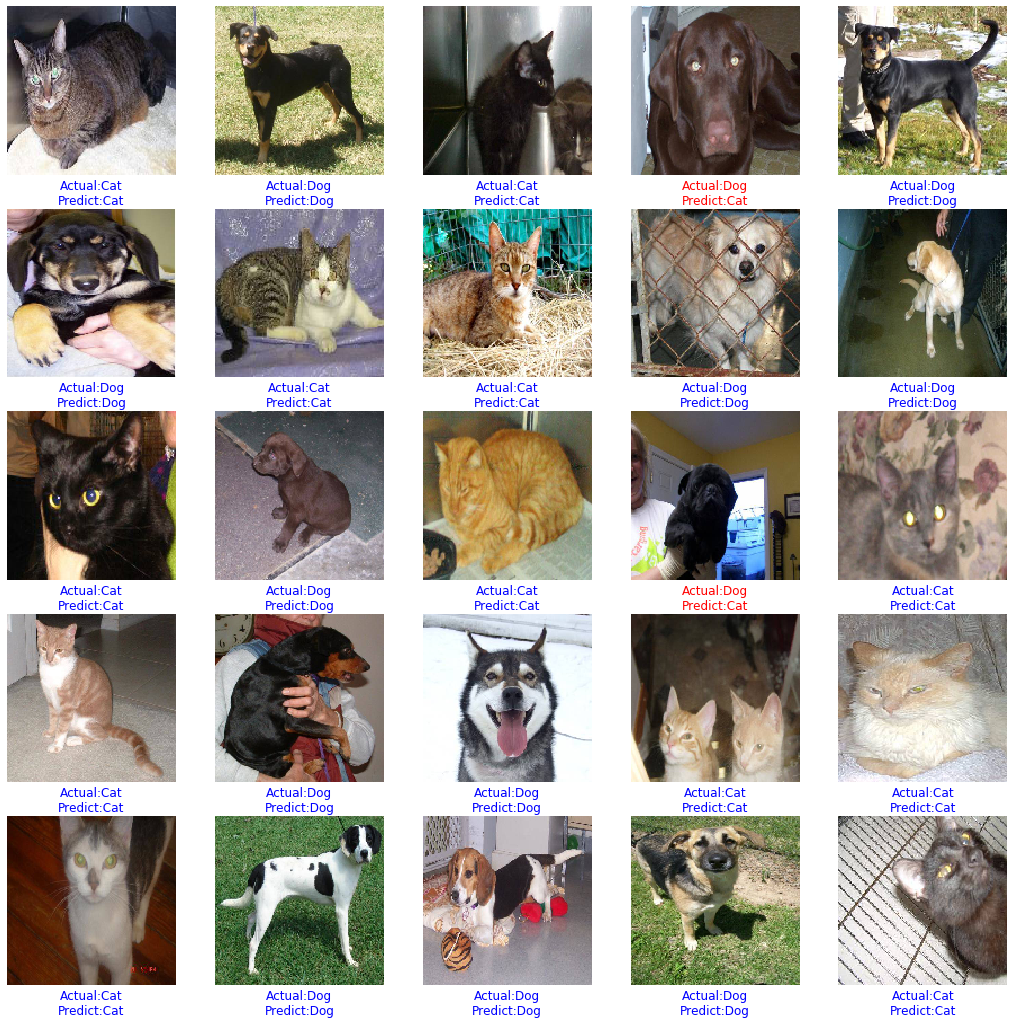

In [43]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def drawDigit2(image, title, isTrue):
    plt.subplot()
    plt.imshow(image)
    plt.axis('off')
    if not isTrue:
        plt.title(title, color='red')
    else:
        plt.title(title, color='blue')



def batchDraw2(batch_size):
    images = val_data_gen[0][0][: batch_size]
    actual_labels = val_data_gen[0][1][: batch_size]
    predict_labels = predictions[: batch_size]
    plt.figure(figsize=(18, 18))
    for i in range(batch_size):
        image = images[i]
        actual_label = int(actual_labels[i])
        actual = class_names[actual_label]
        predict_label = int(round(predict_labels[i][0]))
        predict = class_names[predict_label]
        isTrue = actual==predict
        title = 'Actual:%s\nPredict:%s' %(actual,predict)
        ax = plt.subplot(5, 5, i+1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        font = {'size': 12, }
        if not isTrue:
            plt.xlabel(title,font, color='red')
        else:
            plt.xlabel(title, font, color='blue' )
#         drawDigit2(image, title, isTrue)

batchDraw2(25)
# plt.savefig("dogs-vs-cats.png")
plt.show()

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(val_data_gen[0][0][85+i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.tight_layout()
plt.show()